In [68]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [69]:
import numpy as np
import pandas as pd

In [70]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [71]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [72]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [73]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [74]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [75]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [76]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [77]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [78]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results


In [79]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

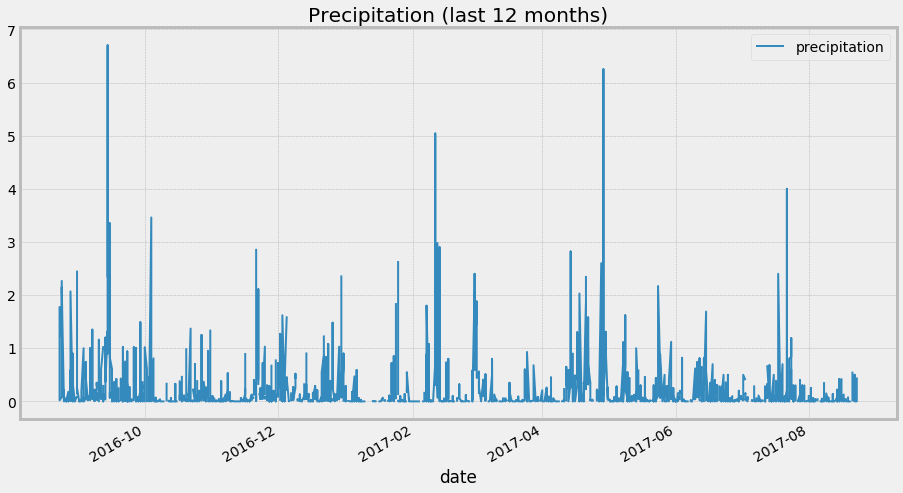

In [83]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# Get the first element from the dataset
last_date = last_date[0]

# Calculate the date 1 year ago from today
# Make it 366 days to include the first full day values.
a_year_ago = dt.datetime.strptime(last_date, "%Y-%m-%d") - dt.timedelta(days=366)

# Perform a query to retrieve the data and precipitation scores
query = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= a_year_ago).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(query,columns=['date', 'precipitation'])

# Change datatype from element to datetime object on Pandas
precipitation_df['date'] = pd.to_datetime(precipitation_df['date'], format='%Y-%m-%d')

# Set index to date
precipitation_df.set_index('date', inplace=True)

# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values(by='date',ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(title="Precipitation (last 12 months)")
plt.legend(loc='upper right')
plt.savefig("NewImages/Precipitation.png")
plt.show()
plt.rcParams['figure.figsize']= (14,8)
plt.style.use('bmh')

In [84]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [85]:
precipitation_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [86]:
# How many stations are available in this dataset?
available_stations = session.query(Measurement.station).distinct().count()
print(f"Available Stations: {available_stations} ")

Available Stations: 9 


In [87]:
# What are the most active stations?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by\
(func.count(Measurement.station).desc()).all()
print("Most Active Stations")
active_stations

Most Active Stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [88]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [89]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
most_active_station=active_stations[0][0]
most_active_temps = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),\
                                  func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station).all()
# print(f"Most Active Station Temperatures")
print(f"Lowest Temperature: {most_active_temps[0][0]}, Highest Temperature: {most_active_temps[0][1]},\
 Average Temperature: {most_active_temps[0][2]}")


Lowest Temperature: 54.0, Highest Temperature: 85.0, Average Temperature: 71.66378066378067


In [90]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


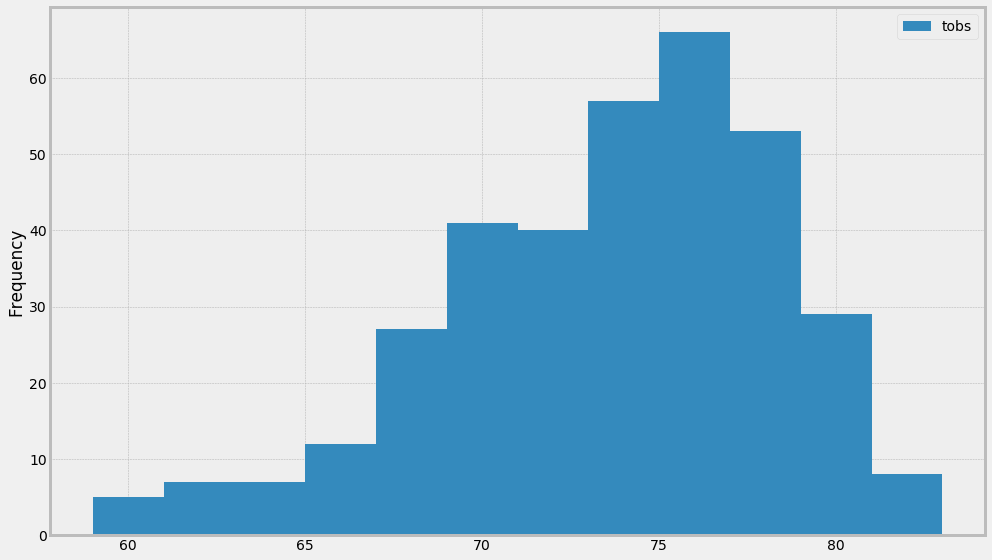

In [91]:
highest_temps_station = session.query(Measurement.station, func.count(Measurement.tobs)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
highest_temps_station= highest_temps_station[0]

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_observations = session.query( Measurement.tobs).filter(Measurement.date\
                                                                   >= a_year_ago).filter(Measurement.station ==\
                                                                                       highest_temps_station).all()
temperature_observations = pd.DataFrame(temperature_observations, columns=['tobs'])

# We need 12 bins since the observation is for twelve months
temperature_observations.plot.hist(bins=12)
plt.tight_layout()
plt.savefig("NewImages/TemperaturevsFrequency.png")
plt.show()